/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in ubyte_scalars


315.20098319332857 106.00980343935827


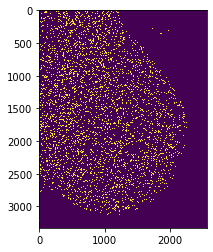

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
image = '/home/cot12/Documents/test-folder/B/image_10-14-2019_12.jpg'
Beginning_image = cv2.imread(image,0) #read image "0" for gray and "1" for colour

def Image_check_x(image):
    p = image.shape[0]
    if ((p+3)/4) != int((p+3)/4):
        if ((p+2)/4) != int((p+2)/4):
            if ((p+1)/4) != int((p+1)/4):
                return p
            else:
                return p+1
        else:
            return p+2
    else:
        return p+3



def Image_check_y(image):
    p = image.shape[1]
    if ((p+3)/4) != int((p+3)/4):
        if ((p+2)/4) != int((p+2)/4):
            if ((p+1)/4) != int((p+1)/4):
                return p
            else:
                return p+1
        else:
            return p+2
    else:
        return p+3
    
    
q = int(Image_check_x(Beginning_image))
u = int(Image_check_y(Beginning_image))
beginning_image = cv2.resize(Beginning_image,(u,q))
s = 3
k = 2 ** (1.0 / s) #kernals
sig = 1.6
kvector = np.array([sig, k*sig, sig*(k**2), sig*(k**3), sig*(k**4), sig*(k**5),sig*(k**6), sig*(k**7), sig*(k**8)])
c = -1
threshold = 1


doubled = cv2.resize((beginning_image), ((2*u),(2*q)))
normal = cv2.resize((doubled),(u,q))
pyrlvl = np.zeros((normal.shape[0], normal.shape[1]))    
pyrlvlx = np.zeros((normal.shape[0], normal.shape[1]))
pyrlvly = np.zeros((normal.shape[0], normal.shape[1]))
pyrlvl = ndimage.filters.gaussian_filter(normal,kvector[0])
pyrlvlx[:,:] = ndimage.sobel(pyrlvl, 0)
pyrlvly[:,:] = ndimage.sobel(pyrlvl, 1)
#pyrlvl[:,:] = ndimage.filters.gaussian_filter(normal,kvector[3])
Exlvl1 = np.zeros((normal.shape[0], normal.shape[1]))
Grmaglvl = np.zeros((normal.shape[0], normal.shape[1]))
Orientlvl = np.zeros((normal.shape[0], normal.shape[1]))
Orientlvl_absolute = np.zeros((normal.shape[0], normal.shape[1]))
value_count = np.zeros((normal.shape[0], normal.shape[1]))
Grmaglvl = (((pyrlvlx)**2)+((pyrlvly)**2))**0.5


for j in range(1, normal.shape[0]-1):
        for k in range(1, normal.shape[1]-1):
            Orientlvl[j,k] = np.rint(((180/np.pi)*np.arctan2((pyrlvl[j,k+1]-pyrlvl[j,k-1]),(pyrlvl[j+1,k]-pyrlvl[j-1,k]))))
            if Grmaglvl[j,k]> 0:
                value_count[j,k] = 1
number_values = np.sum(value_count)
gradient_values = np.sum(Grmaglvl)
mean = gradient_values/number_values
lowest_value = np.min(Grmaglvl[np.nonzero(Grmaglvl)])
percentile = (mean - lowest_value)/2
upper_percentile = mean + percentile
lower_percentile = mean - percentile

Orientlvl_absolute[:,:] = np.absolute(Orientlvl[:,:])

for j in range(1, normal.shape[0]-1):
    for k in range(1, normal.shape[1]-1):
        if Grmaglvl[j,k] < 200:
            continue
        if 67.5 < Orientlvl_absolute[j,k] < 112.5:
            if Grmaglvl[j,k] < Grmaglvl[j,k+1] and Grmaglvl[j,k] < Grmaglvl[j,k-1]:
                Exlvl1[j,k] = 1
        elif 0 < Orientlvl_absolute[j,k] < 22.5:
            if Grmaglvl[j,k] > Grmaglvl[j+1,k] and Grmaglvl[j,k] > Grmaglvl[j-1,k]:
                Exlvl1[j,k] = 1
        elif 157.5 < Orientlvl_absolute[j,k] < 181:
            if Grmaglvl[j,k] > Grmaglvl[j+1,k] and Grmaglvl[j,k] > Grmaglvl[j-1,k]:
                Exlvl1[j,k] = 1
        elif 22.5 < Orientlvl_absolute[j,k] < 67.5:
            if Orientlvl[j,k] > 0:
                if Grmaglvl[j,k] > Grmaglvl[j+1,k+1] and Grmaglvl[j,k] > Grmaglvl[j-1,k-1]:
                    Exlvl1[j,k] = 1
                else:
                    continue
            else:
                if Grmaglvl[j,k] > Grmaglvl[j-1,k+1] and Grmaglvl[j,k] > Grmaglvl[j+1,k-1]:
                    Exlvl1[j,k] = 1
        elif 112.5 < Orientlvl_absolute[j,k] < 157.5:
            if Orientlvl[j,k] > 0:
                if Grmaglvl[j,k] > Grmaglvl[j-1,k+1] and Grmaglvl[j,k] > Grmaglvl[j+1,k-1]:
                    Exlvl1[j,k] = 1
                else:
                    continue
            else:
                if Grmaglvl[j,k] > Grmaglvl[j+1,k+1] and Grmaglvl[j,k] > Grmaglvl[j-1,k-1]:
                    Exlvl1[j,k] = 1
exlvl = 255*Exlvl1[:,:]
plt.imshow(exlvl)
#cv2.imwrite('/home/cot12/Documents/test-folder/tests/client-100-80.1.jpg', exlvl)
print(upper_percentile,lower_percentile)

In [23]:
print(Beginning_image.shape[0])

AttributeError: 'NoneType' object has no attribute 'shape'